In [2]:
# https://www.quora.com/Census-Where-can-I-find-a-list-of-US-zip-codes-with-corresponding-population-density
import pandas as pd
import numpy as np
from geopy.distance import lonlat, distance, geodesic
pd.options.display.max_columns=999

In [3]:
pop = pd.read_csv('ACS_16_5YR_B01003_with_ann.csv')
area = pd.read_csv('2014_Gaz_zcta_national.txt', sep = '\t')
pop = pop.drop(0,0)
pop = pop.replace("*****",np.nan)
pop['GEOID'] = pd.to_numeric(pop['GEO.id2'])
pop['HD01_VD01'] = pd.to_numeric(pop['HD01_VD01'])
pop['HD02_VD01'] = pd.to_numeric(pop['HD02_VD01'])
df = pd.merge(pop,area,on='GEOID')
df.columns = ['GEO.id',
 'GEO.id2',
 'GEO.display-label',
 'HD01_VD01',
 'HD02_VD01',
 'GEOID',
 'ALAND',
 'AWATER',
 'ALAND_SQMI',
 'AWATER_SQMI',
 'INTPTLAT',
 'INTPTLONG']
df['lat'] = df['INTPTLAT']
df['lng'] = df['INTPTLONG']
df['pop'] = df['HD01_VD01']
df['aland'] = df['ALAND_SQMI']
df['awater'] = df['AWATER_SQMI']
df = df[['GEOID','aland','awater','pop','lat','lng']]
df['density'] = df['pop'] / df['aland']
df.shape

(33120, 7)

In [4]:
df.head()

GEOID   aland  awater    pop        lat        lng      density
0    601  64.348   0.309  17800  18.180555 -66.749961   276.620874
1    602  30.613   1.718  39716  18.361945 -67.175597  1297.357332
2    603  31.616   0.071  51565  18.455183 -67.119887  1630.977986
3    606  42.309   0.005   6320  18.158345 -66.932911   149.377201
4    610  35.916   1.611  27976  18.295366 -67.125135   778.928611

In [5]:
df[df['pop'] > 100].shape

(31517, 7)

In [6]:
import matplotlib.pyplot as plt
np.histogram(df['density'])

(array([32718,   251,    64,    35,    16,    14,    10,     6,     4,
            2]),
 array([     0.        ,  15400.95846645,  30801.91693291,  46202.87539936,
         61603.83386581,  77004.79233227,  92405.75079872, 107806.70926518,
        123207.66773163, 138608.62619808, 154009.58466454]))

(array([2.4146e+04, 3.8380e+03, 2.5630e+03, 1.4460e+03, 6.5500e+02,
        2.7200e+02, 1.2000e+02, 4.4000e+01, 2.9000e+01, 7.0000e+00]),
 array([     0. ,  11510.4,  23020.8,  34531.2,  46041.6,  57552. ,
         69062.4,  80572.8,  92083.2, 103593.6, 115104. ]),
 <a list of 10 Patch objects>)

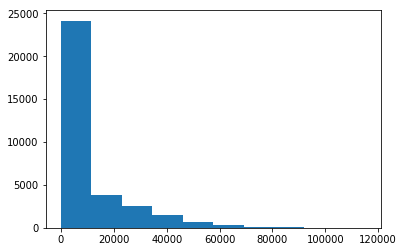

In [7]:
plt.hist(df['pop'])

In [8]:
df = df[df['pop'] > 20000]
df.head()

GEOID   aland  awater    pop        lat        lng      density
1    602  30.613   1.718  39716  18.361945 -67.175597  1297.357332
2    603  31.616   0.071  51565  18.455183 -67.119887  1630.977986
4    610  35.916   1.611  27976  18.295366 -67.125135   778.928611
5    612  67.605   3.788  63884  18.402253 -66.711397   944.959692
7    617  15.192   1.540  24648  18.445147 -66.559696  1622.432859

In [9]:
df.shape

(5982, 7)

In [3]:
summation = 0
for n in range(0,5982):
    summation += n+n-1
summation

35772360

In [10]:
df.head()

GEOID   aland  awater    pop        lat        lng      density
1    602  30.613   1.718  39716  18.361945 -67.175597  1297.357332
2    603  31.616   0.071  51565  18.455183 -67.119887  1630.977986
4    610  35.916   1.611  27976  18.295366 -67.125135   778.928611
5    612  67.605   3.788  63884  18.402253 -66.711397   944.959692
7    617  15.192   1.540  24648  18.445147 -66.559696  1622.432859

In [11]:
[*df.index]

[1,
 2,
 4,
 5,
 7,
 9,
 10,
 11,
 13,
 15,
 16,
 22,
 24,
 26,
 27,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 40,
 41,
 43,
 44,
 46,
 50,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 80,
 81,
 84,
 85,
 87,
 88,
 89,
 97,
 101,
 102,
 103,
 105,
 109,
 113,
 114,
 115,
 116,
 118,
 119,
 123,
 124,
 125,
 128,
 129,
 130,
 132,
 141,
 142,
 158,
 162,
 183,
 186,
 195,
 199,
 200,
 207,
 268,
 275,
 279,
 319,
 335,
 336,
 337,
 338,
 343,
 346,
 347,
 350,
 362,
 365,
 366,
 373,
 374,
 375,
 376,
 377,
 378,
 380,
 381,
 386,
 387,
 388,
 389,
 391,
 392,
 393,
 398,
 399,
 401,
 402,
 403,
 404,
 406,
 408,
 409,
 413,
 416,
 418,
 423,
 428,
 431,
 437,
 439,
 443,
 444,
 447,
 448,
 454,
 458,
 468,
 469,
 470,
 471,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 481,
 482,
 483,
 485,
 486,
 487,
 488,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 500,
 502,
 505,
 506,
 507,
 508,
 516,
 517,
 518,
 520,
 528,
 534,
 538,
 545,
 

In [12]:
df2 = pd.concat([pd.concat([df[df.index == [*df.index][0]]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1, sort=False).reset_index()
for n in [*df.index][1:]:
    df3 = pd.concat([df.reset_index(),pd.concat([df[df.index == n]]*df.shape[0]).reset_index().add_suffix('_x')],axis=1, sort=False)
    df2 = pd.concat([df2,df3], sort=False)

In [13]:
df = df2.dropna()

In [14]:
df.head()

index  index_x  GEOID_x  aland_x  awater_x    pop_x      lat_x      lng_x  \
1      1      1.0    602.0   30.613     1.718  39716.0  18.361945 -67.175597   
2      2      1.0    602.0   30.613     1.718  39716.0  18.361945 -67.175597   
4      4      1.0    602.0   30.613     1.718  39716.0  18.361945 -67.175597   
5      5      1.0    602.0   30.613     1.718  39716.0  18.361945 -67.175597   
7      7      1.0    602.0   30.613     1.718  39716.0  18.361945 -67.175597   

     density_x  GEOID   aland  awater      pop        lat        lng  \
1  1297.357332  602.0  30.613   1.718  39716.0  18.361945 -67.175597   
2  1297.357332  603.0  31.616   0.071  51565.0  18.455183 -67.119887   
4  1297.357332  610.0  35.916   1.611  27976.0  18.295366 -67.125135   
5  1297.357332  612.0  67.605   3.788  63884.0  18.402253 -66.711397   
7  1297.357332  617.0  15.192   1.540  24648.0  18.445147 -66.559696   

       density  
1  1297.357332  
2  1630.977986  
4   778.928611  
5   944.959692  
7  1622.432859

In [15]:
from geopy.distance import lonlat, distance, geodesic
df = df.dropna(subset=['lat','lat_x']).reset_index()
df['combined_pop'] = df['pop']+df['pop_x']
df['distance'] = [geodesic(lonlat(df['lng'][x], df['lat'][x]), lonlat(df['lng_x'][x], df['lat_x'][x])).km for x in range(df.shape[0])]
df = df[df['distance'] > 0]
df['power'] = df['combined_pop'] / df['distance']
df = df[df['distance'] > 0]
df.head()

MemoryError: 

In [ ]:
df = df.sort_values(by='pop', ascending = False)#.drop_duplicates(subset='combined_pop').sort_values(by='combined_pop', ascending = False)

In [ ]:
df.shape

In [ ]:
df.sort_values('power', ascending = False)

In [ ]:
df[df['lat'] > 44].sort_values('power', ascending = False)

In [ ]:
statezip = pd.read_csv('16zpallagi.csv')

In [ ]:
df.head()

In [ ]:
df = pd.merge(df,statezip[['STATE','zipcode']],left_on='GEOID',right_on='zipcode')
df = pd.merge(df,statezip[['STATE','zipcode']].reset_index().add_suffix('_x'),left_on='GEOID_x',right_on='zipcode_x')

In [ ]:
df = df.drop('index_x_y',1).drop_duplicates().sort_values('power', ascending = False)

In [ ]:
df['STATE'].value_counts()

In [ ]:
df[df['STATE'] == 'WA']

In [ ]:
df.to_csv('largezips.csv')